In [1]:
%load_ext autoreload
%autoreload 2

from model import EfficientDetModel
import torch
import pandas as pd
from data_utils import CarsDatasetAdaptor, EfficientDetDataModule
from pathlib import Path
from plot_functions import compare_bboxes_for_image


/home/holden/miniconda3/envs/ptorch-lightning/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
dataset_path = Path('../data-gen/output')
df = pd.read_csv(dataset_path/'testannotations.csv')
train_data_path = dataset_path/'test'
cars_train_ds = CarsDatasetAdaptor(train_data_path, df)
model = EfficientDetModel(
    num_classes=13,
    img_size=512,
    model_architecture="efficientnet_b0"
    )

model.load_state_dict(torch.load('efficientdet_b0_pytorch_50epoch'))
model.eval()

print("loaded model")

loaded model


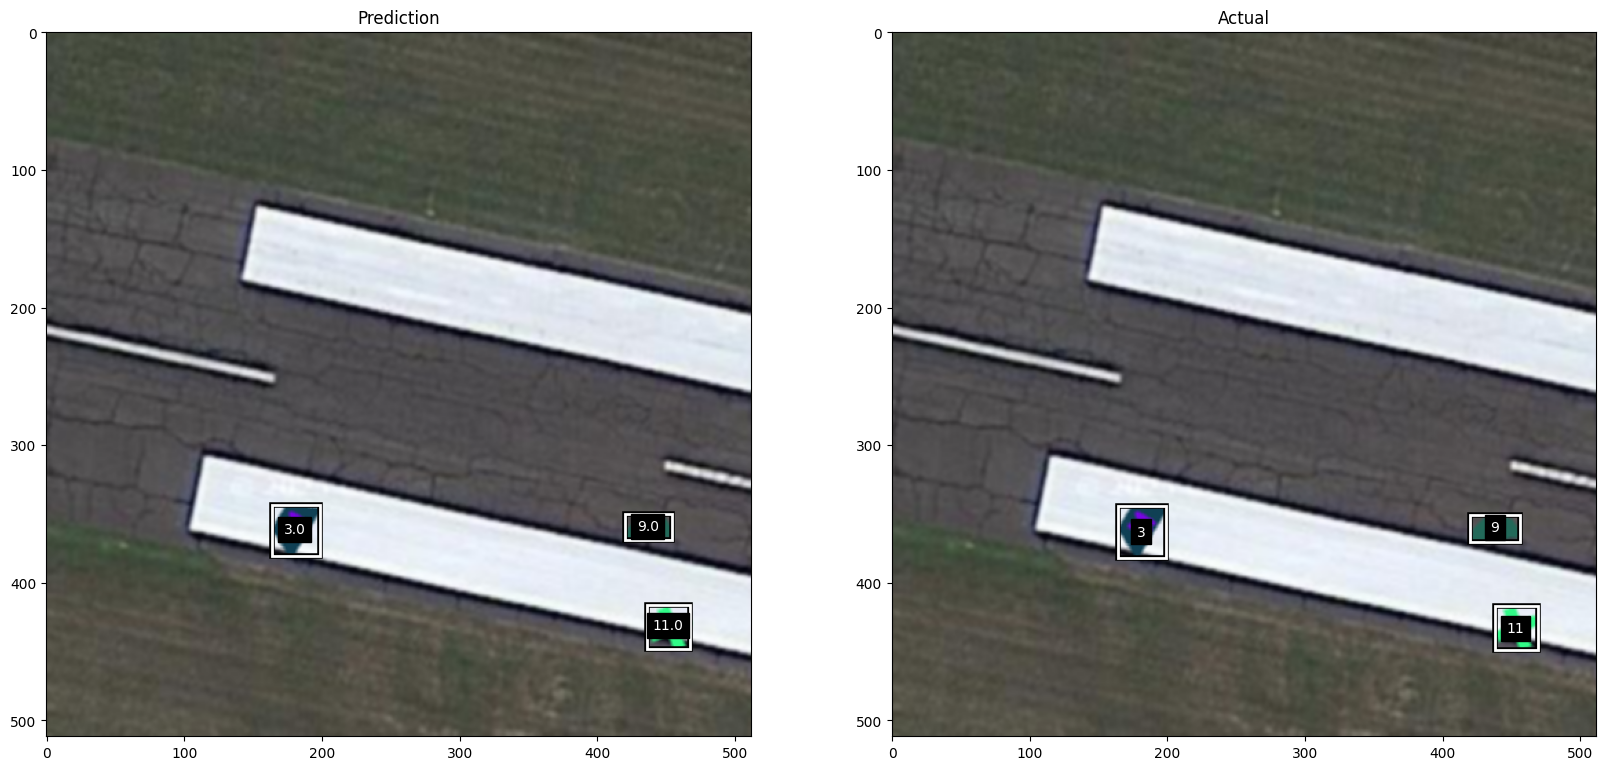

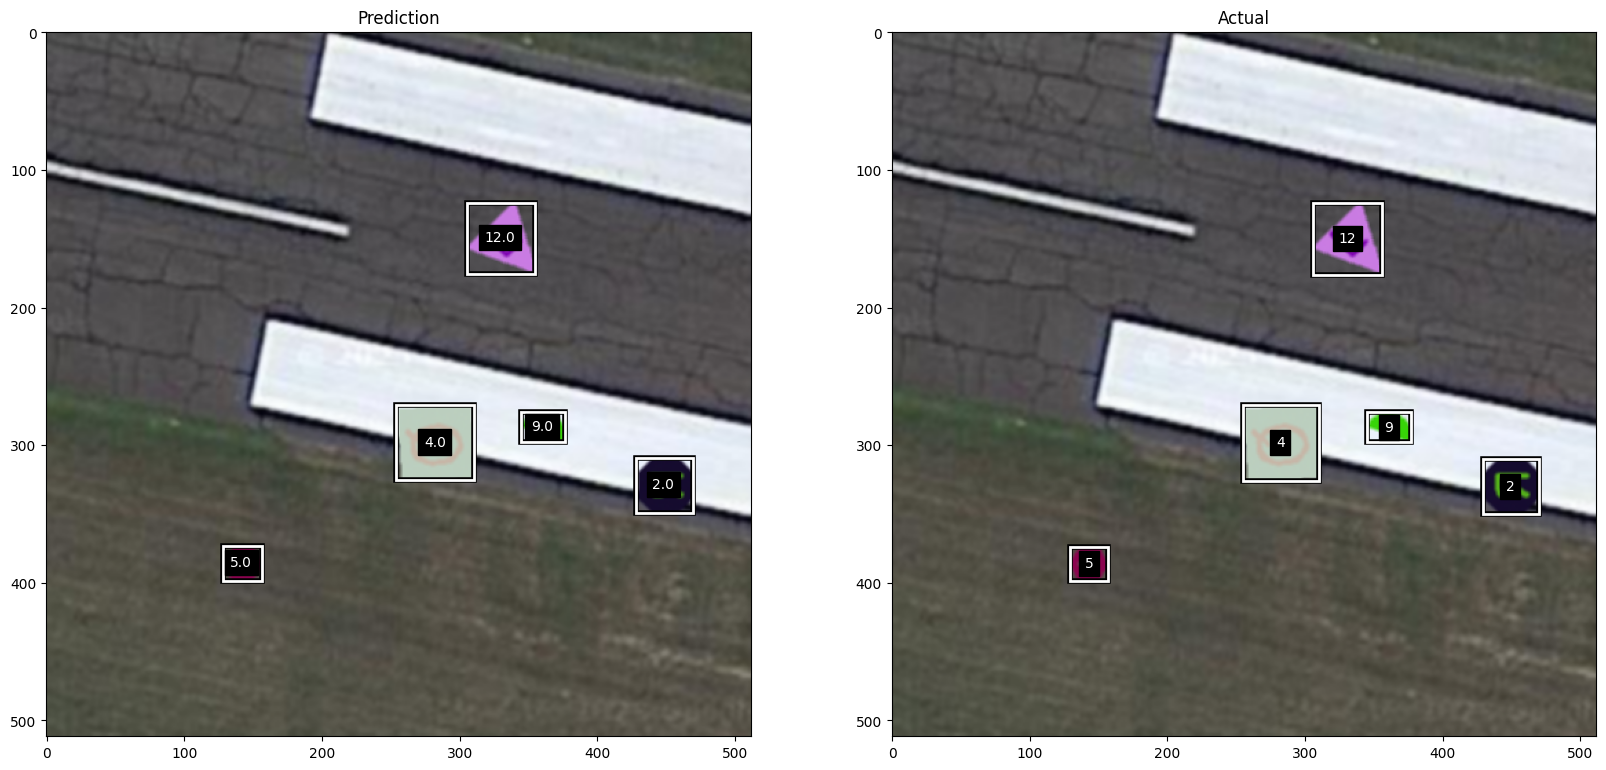

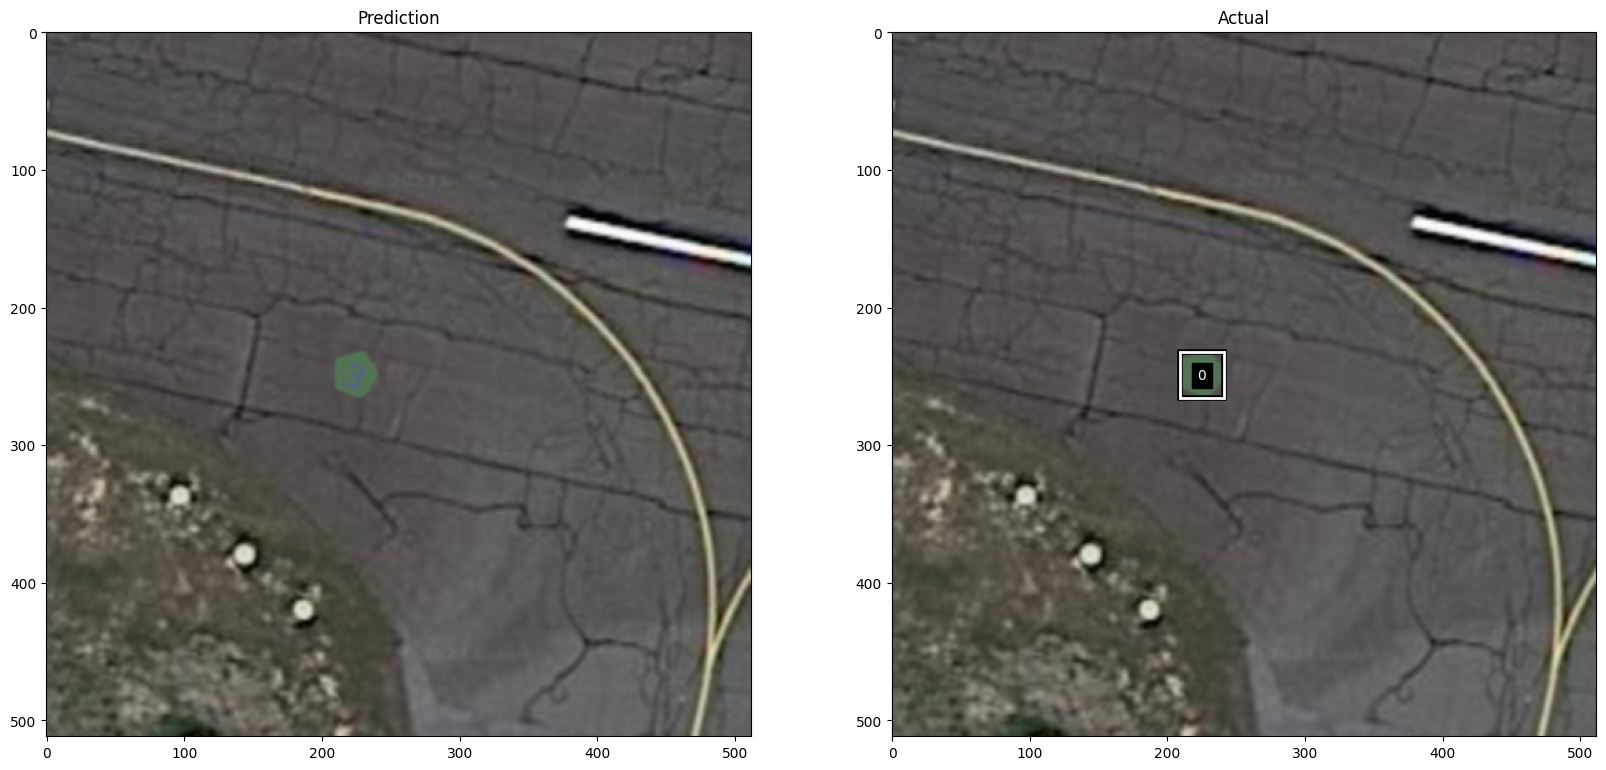

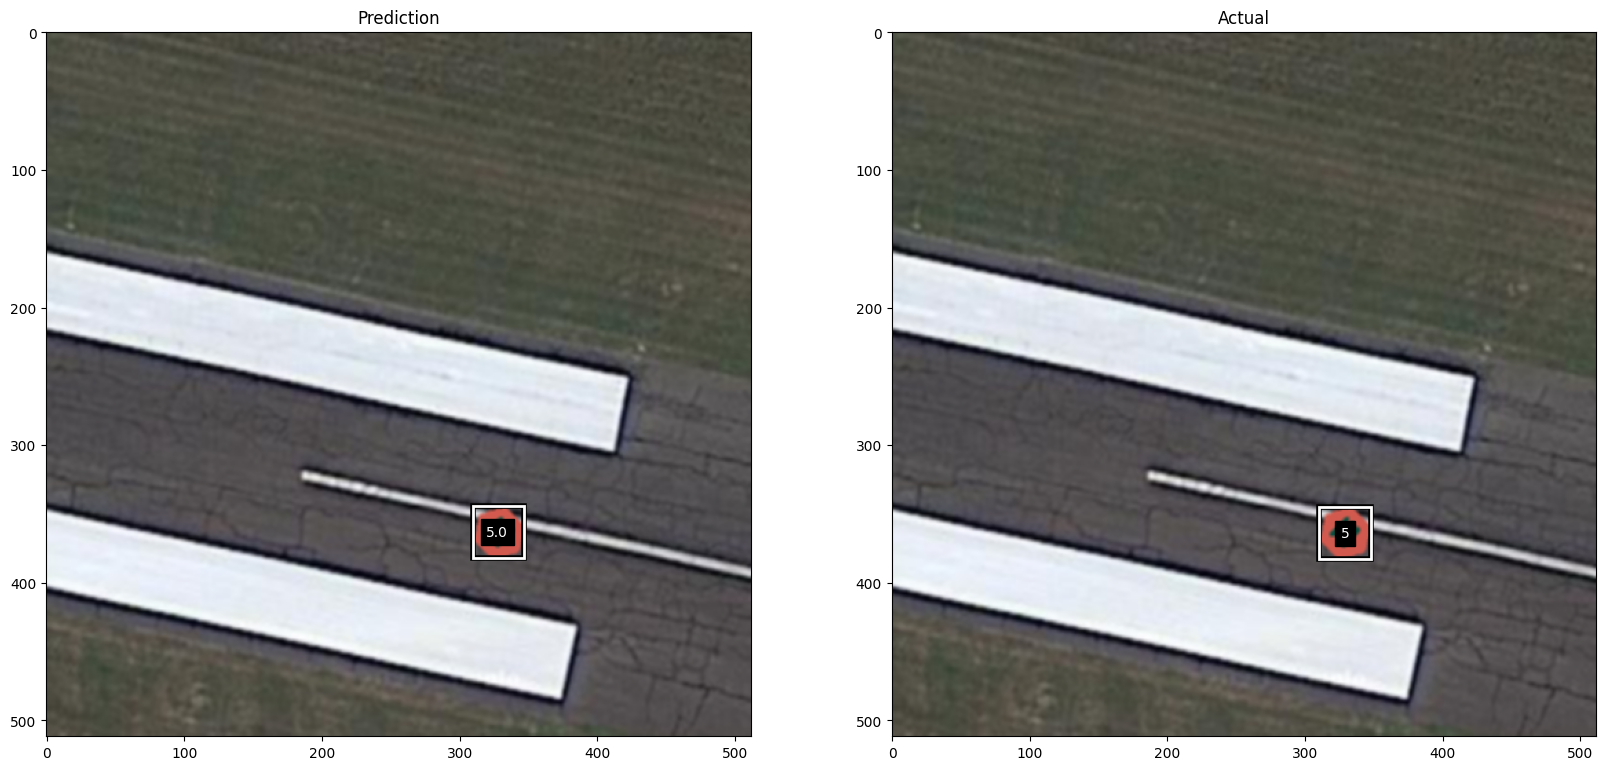

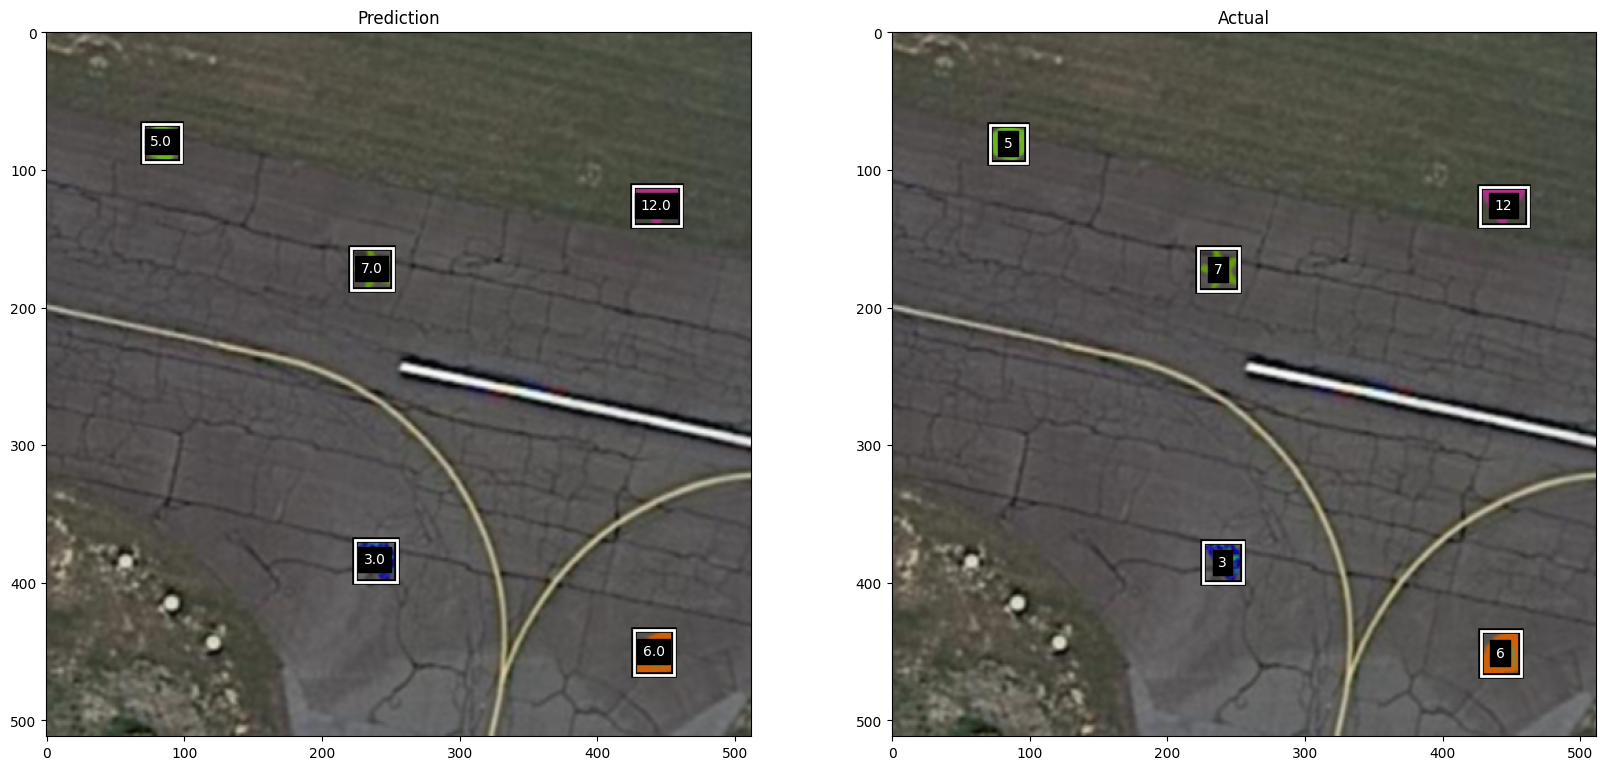

In [46]:

num_samples = 5#len(cars_train_ds.images)
img_labels_list = [cars_train_ds.get_image_and_labels_by_idx(i) for i in range(num_samples)]
# type of img_labels_list: [(PIL image, ndarray, pd.Series, int)]
images = [x[0] for x in img_labels_list]
actual_labels = [x[2].values for x in img_labels_list]
# print(len(actual_labels), actual_labels[0])
predicted_bboxes, predicted_class_labels, predicted_class_confidences  = model.predict(images)
for i in range(num_samples):
    # print(i, predicted_class_confidences[i], predicted_class_labels[i])
    image = images[i]
    truth_bboxes = img_labels_list[i][1]
    compare_bboxes_for_image(image, predicted_bboxes=predicted_bboxes[i], actual_bboxes=truth_bboxes.tolist(), predicted_labels=predicted_class_labels[i], actual_labels=actual_labels[i])
